<a href="https://colab.research.google.com/github/harshi1112/Behaviour-Analysis/blob/main/Copy_of_Customer_Behaviour_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



Load the dataset


In [ ]:
df = pd.read_csv('ecommerce_customer_data.csv')
print(df.head())

   User_ID  Gender  Age   Location Device_Type  Product_Browsing_Time  \
0        1  Female   23  Ahmedabad      Mobile                     60   
1        2    Male   25    Kolkata      Tablet                     30   
2        3    Male   32  Bangalore     Desktop                     37   
3        4    Male   35      Delhi      Mobile                      7   
4        5    Male   27  Bangalore      Tablet                     35   

   Total_Pages_Viewed  Items_Added_to_Cart  Total_Purchases  
0                  30                    1                0  
1                  38                    9                4  
2                  13                    5                0  
3                  20                   10                3  
4                  20                    8                2  


Getting general information about data

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB
None


Statistical summary for numerical columns

In [ ]:
print(df.describe())

          User_ID         Age  Product_Browsing_Time  Total_Pages_Viewed  \
count  500.000000  500.000000             500.000000          500.000000   
mean   250.500000   26.276000              30.740000           27.182000   
std    144.481833    5.114699              15.934246           13.071596   
min      1.000000   18.000000               5.000000            5.000000   
25%    125.750000   22.000000              16.000000           16.000000   
50%    250.500000   26.000000              31.000000           27.000000   
75%    375.250000   31.000000              44.000000           38.000000   
max    500.000000   35.000000              60.000000           50.000000   

       Items_Added_to_Cart  Total_Purchases  
count           500.000000       500.000000  
mean              5.150000         2.464000  
std               3.203127         1.740909  
min               0.000000         0.000000  
25%               2.000000         1.000000  
50%               5.000000         2.00

Summary for non numeric columns

In [ ]:
print(df.describe(include = 'object'))

       Gender Location Device_Type
count     500      500         500
unique      2        8           3
top      Male  Kolkata      Mobile
freq      261       71         178


Demographic Analysis

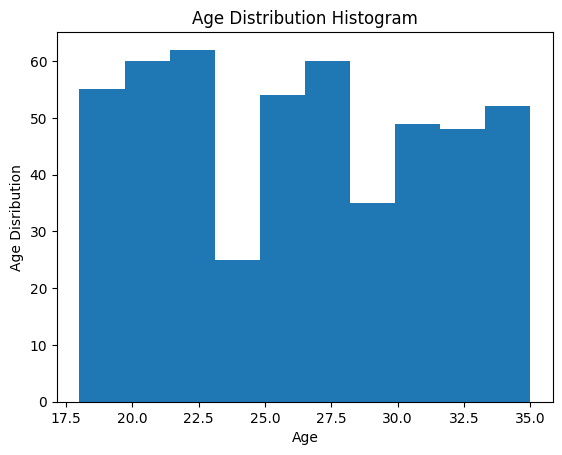

In [ ]:
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Age Disribution")
plt.title("Age Distribution Histogram")
plt.show()

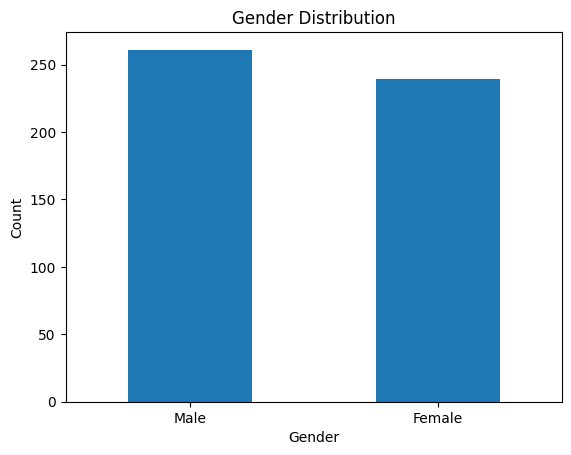

In [ ]:
gender_distribution=df['Gender'].value_counts()
gender_distribution.plot(kind ='bar',rot=0)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Analysing purchase made location wise

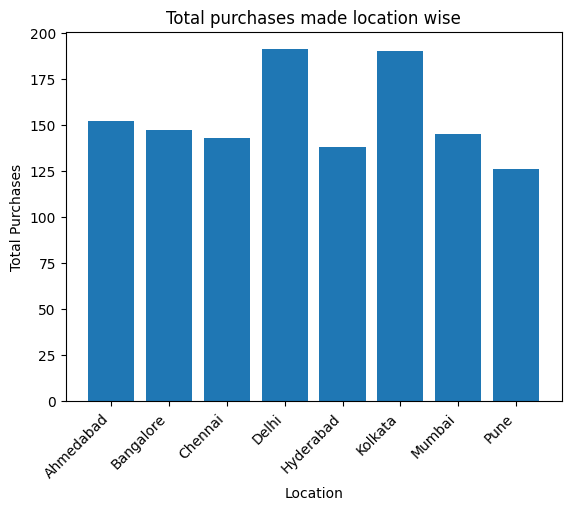

In [ ]:
location_grouped=df.groupby('Location')['Total_Purchases'].sum().reset_index()

plt.bar(location_grouped['Location'],location_grouped['Total_Purchases'])
plt.title('Total purchases made location wise')
plt.xlabel('Location')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45,ha='right')
plt.show()


Device Usage

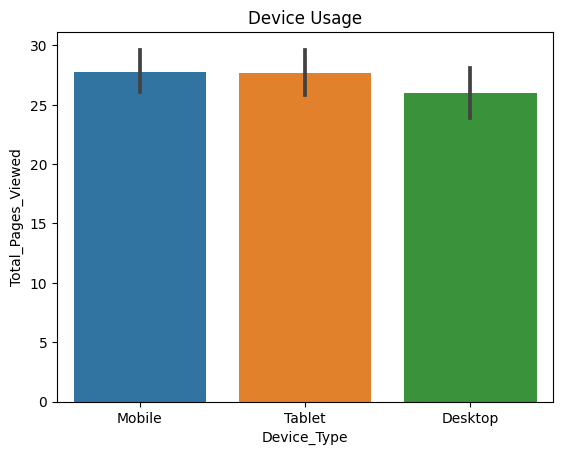

In [ ]:
device_distribution=df['Device_Type'].value_counts()
device_behavior=sns.barplot(x='Device_Type',y='Total_Pages_Viewed',data=df).set( title='Device Usage')

Behaviour Analysis

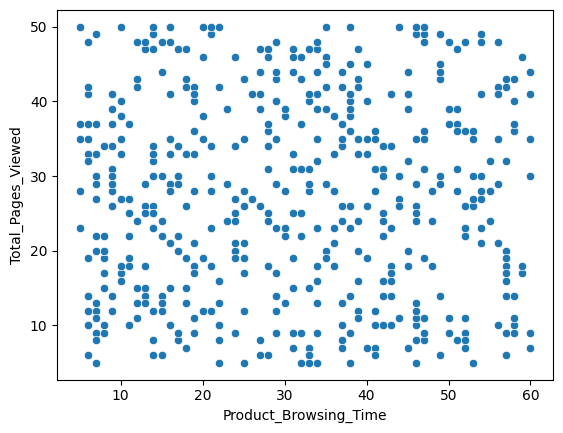

In [ ]:
time_vs_pages=sns.scatterplot(x='Product_Browsing_Time',y='Total_Pages_Viewed',data=df)




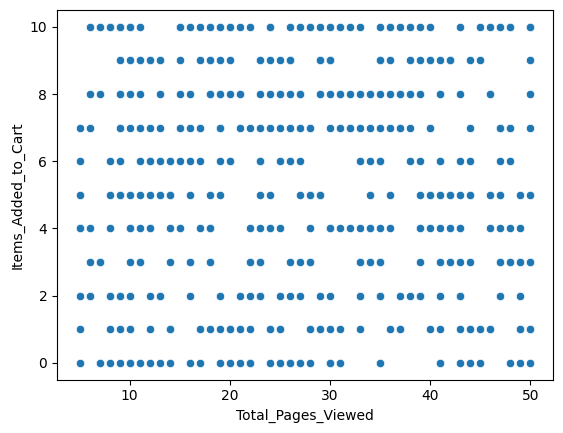

In [ ]:
pages_vs_cart=sns.scatterplot(x='Total_Pages_Viewed',y='Items_Added_to_Cart',data=df)

Average purchase by Gender

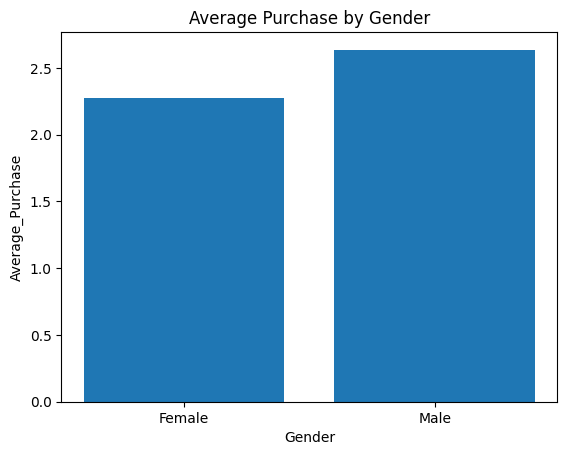

In [ ]:
gender_grouped=df.groupby('Gender')['Total_Purchases'].mean().reset_index()
plt.bar(gender_grouped['Gender'],gender_grouped['Total_Purchases'])
plt.title('Average Purchase by Gender')
plt.xlabel('Gender')
plt.ylabel('Average_Purchase')
plt.show()

Conversion Rates

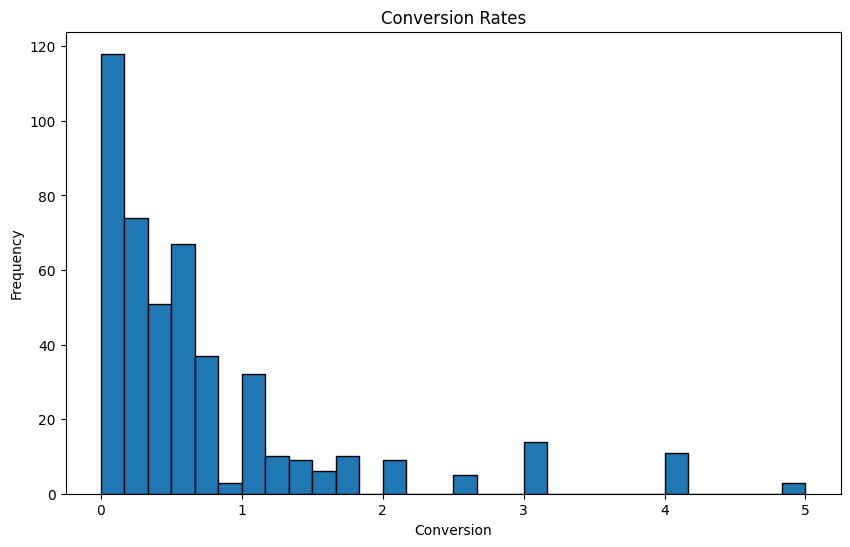

In [ ]:
df['conversion_rates']=df['Total_Purchases']/df['Items_Added_to_Cart']
# Remove infinite and NaN values
valid_conversion_rates=df['conversion_rates'][np.isfinite(df['conversion_rates'])]
plt.figure(figsize=(10,6))
plt.hist(valid_conversion_rates,bins=30,edgecolor='black')
plt.title('Conversion Rates')
plt.xlabel('Conversion')
plt.ylabel('Frequency')
plt.show()

Calculating Churn Rate

In [ ]:
df['churn']=df['Total_Purchases']==0
churn_rate=df['churn'].sum(), df['churn'].mean()
print(churn_rate)

(99, 0.198)
